In [6]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv("country_wise_latest.csv")
training_set = dataset_train.iloc[:,1:2].values   # les deux premiers colonnes 

# Effectuez une mise à l'échelle des fonctionnalités pour transformer les données
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [17]:
# Creation d'une structure de données aves 20 pas au temps et 1 a la sortie 
X_train = []
y_train = []
for i in range(60, 125):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


# Le RNN construit pour une classification binaires simples

In [8]:
# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM (Long Short-Term Memory ) layer  : 
#pour resoudre le probleme de memoire a court terme dans le cas de type de traitemet un a un d'une seul couche 


regressor.add(LSTM(units = 3,activation='sigmoid',input_shape = (None, 1))) #  introduire la non-linéarité dans le modèles


In [9]:
# on ajoute une seule couche a la sortie 
regressor.add(Dense(units = 1))

# les layer decrivent les types de réseaux de neurones dans le cas suivant est type de un a un 
#utilisé dans l'aprrentissage automatique 

# un classificateurs linéaires aux neurones (Compiling the RNN)
regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

# Ajuster les données  
regressor.fit(X_train, y_train, epochs = 220, batch_size = 32)


Epoch 1/220
4/4 [==============================] - 1s 8ms/step - loss: 0.0776
Epoch 2/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0629
Epoch 3/220
4/4 [==============================] - 0s 8ms/step - loss: 0.0538
Epoch 4/220
4/4 [==============================] - 0s 10ms/step - loss: 0.0469
Epoch 5/220
4/4 [==============================] - 0s 9ms/step - loss: 0.0409
Epoch 6/220
4/4 [==============================] - 0s 8ms/step - loss: 0.0358
Epoch 7/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0311
Epoch 8/220
4/4 [==============================] - 0s 8ms/step - loss: 0.0269
Epoch 9/220
4/4 [==============================] - 0s 8ms/step - loss: 0.0233
Epoch 10/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0201
Epoch 11/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0171
Epoch 12/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0146
Epoch 13/220
4/4 [==============================] - 0s 6ms/s

4/4 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 105/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 106/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 107/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 108/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 109/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 110/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 111/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 112/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 113/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 114/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 115/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0044
Epoch 116/220
4/4 [==============================] - 0

4/4 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 207/220
4/4 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 208/220
4/4 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 209/220
4/4 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 210/220
4/4 [==============================] - 0s 8ms/step - loss: 0.0044
Epoch 211/220
4/4 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 212/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 213/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0043
Epoch 214/220
4/4 [==============================] - 0s 10ms/step - loss: 0.0043
Epoch 215/220
4/4 [==============================] - 0s 9ms/step - loss: 0.0043
Epoch 216/220
4/4 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 217/220
4/4 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 218/220
4/4 [==============================] - 

In [10]:
# Joining the train and test dataset under the real no. 
dataset_test = pd.read_csv('country_wise_latest.csv')
test_set = dataset_test.iloc[:,1:2].values
real_covid_cases = np.concatenate((training_set[0:125], test_set), axis = 0)


In [16]:
# Les cases a predire 
scaled_real_covid_cases= sc.fit_transform(real_covid_cases)
inputs = []
for i in range(20, 136):
    inputs.append(scaled_real_covid_cases[i-20:i, 0])
inputs = np.array(inputs)
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1], 1))

predicted_covid_cases = regressor.predict(inputs)

predicted_covid_cases = sc.inverse_transform(predicted_covid_cases)
predicted_covid_cases=predicted_covid_cases.astype('int64')


4/4 [==============================] - 0s 3ms/step


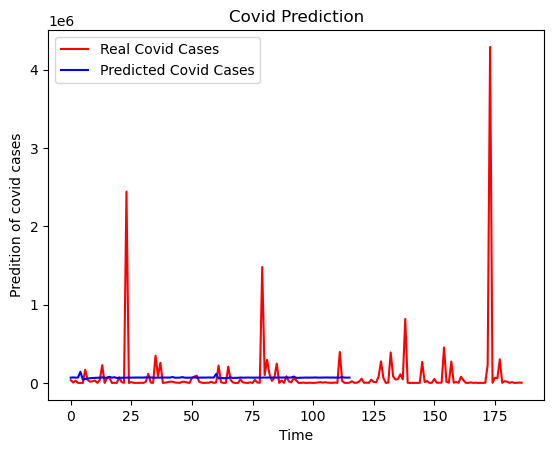

In [18]:
# Visualising the results
plt.plot(test_set, color = 'red', label = 'Real Covid Cases')
plt.plot(predicted_covid_cases, color = 'blue', label = 'Predicted Covid Cases')
plt.title('Covid Prediction')
plt.xlabel('Time')
plt.ylabel('Predition of covid cases')
plt.legend()
plt.show()

In [20]:
# Une exactitude dans une dizaines de jour 
# Or que dans le modele de regression lineaire on a obtenu une exactitude dans 20eme jour seulement 

# Une exactidue dans le 60éme jour 
# Une autre exactitude des valeurs prévues et réels dans 100éme jour 
# On distingue une faible marge d'erreur ainsi une augmentation d'affectation 

# Conclusion 

# La predictivité d'un RNN est plus precise que la predictivité de la regression lineaire 

# Les RNN ne peuvent pas gérer les images avec des dépendances de pixels
# donc on passe au CNN est une architecture de couches convolutives et de couches ReLU 
# on peut apprendre CNN en travaillant sur un projet tel que Convolutional Neural Networks in Python avec Keras 